In [1]:
import sympy as sp
from IPython.display import display, Math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Define symbols and generalized coordinates
t = sp.symbols('t')
q1, q2 = sp.Function('q1')(t), sp.Function('q2')(t)
dq1, dq2 = sp.diff(q1, t), sp.diff(q2, t)
ddq1, ddq2 = sp.diff(dq1, t), sp.diff(dq2, t)
m1, m2, l1, l2, g0, I2 = sp.symbols('m1 m2 l1 l2 g0 I2')
tau1, tau2 = sp.symbols('tau1 tau2')

display(Math(r'q_1(t), q_2(t) \text{ - generalized coordinates}'))
display(Math(r'\dot{q}_1(t), \dot{q}_2(t) \text{ - first derivatives}'))
display(Math(r'\ddot{q}_1(t), \ddot{q}_2(t) \text{ - second derivatives}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
# Position vectors of the center of mass
rcm1 = sp.Matrix([q1, 0, 0])
rcm2 = sp.Matrix([q1 + l2*sp.sin(q2), -l2*sp.cos(q2), 0])

display(Math(r'\mathbf{r}_{cm1} = \begin{bmatrix} q_1 \\ 0 \\ 0 \end{bmatrix}'))
display(Math(r'\mathbf{r}_{cm2} = \begin{bmatrix} q_1 + l_2 \sin(q_2) \\ -l_2 \cos(q_2) \\ 0 \end{bmatrix}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
# Velocities of the center of mass
vcm1 = sp.Matrix([dq1, 0, 0])
vcm2 = sp.Matrix([dq1 + l2*dq2*sp.cos(q2), l2*dq2*sp.sin(q2), 0])

display(Math(r'\dot{\mathbf{v}}_{cm1} = \begin{bmatrix} \dot{q}_1 \\ 0 \\ 0 \end{bmatrix}'))
display(Math(r'\dot{\mathbf{v}}_{cm2} = \begin{bmatrix} \dot{q}_1 + l_2 \dot{q}_2 \cos(q_2) \\ l_2 \dot{q}_2 \sin(q_2) \\ 0 \end{bmatrix}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# Kinetic energy
T1 = 1/2 * m1 * vcm1.dot(vcm1)
T2 = 1/2 * m2 * vcm2.dot(vcm2) + 1/2 * I2 * dq2**2
T = T1 + T2

display(Math(r'T_1 = \frac{1}{2} m_1 \dot{\mathbf{v}}_{cm1} \cdot \dot{\mathbf{v}}_{cm1}'))
display(Math(r'T_2 = \frac{1}{2} m_2 \dot{\mathbf{v}}_{cm2} \cdot \dot{\mathbf{v}}_{cm2} + \frac{1}{2} I_2 \dot{q}_2^2'))
display(Math(r'T = T_1 + T_2'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
# Potential energy
V1 = m1 * g0 * rcm1[1]
V2 = m2 * g0 * rcm2[1]
V = V1 + V2

display(Math(r'V_1 = m_1 g_0 r_{cm1, y}'))
display(Math(r'V_2 = m_2 g_0 r_{cm2, y}'))
display(Math(r'V = V_1 + V_2'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# Lagrangian
L = T - V

display(Math(r'\mathcal{L} = T - V'))

<IPython.core.display.Math object>

In [8]:
# Euler-Lagrange equations
dL_dq1 = sp.diff(L, q1)
dL_dq2 = sp.diff(L, q2)
dL_ddq1 = sp.diff(L, dq1)
dL_ddq2 = sp.diff(L, dq2)
ddt_dL_ddq1 = sp.diff(dL_ddq1, t)
ddt_dL_ddq2 = sp.diff(dL_ddq2, t)

EL1 = sp.Eq(ddt_dL_ddq1 - dL_dq1, tau1)
EL2 = sp.Eq(ddt_dL_ddq2 - dL_dq2, tau2)

display(Math(r'\frac{d}{dt} \left( \frac{\partial \mathcal{L}}{\partial \dot{q}_1} \right) - \frac{\partial \mathcal{L}}{\partial q_1} = \tau_1'))
display(Math(r'\frac{d}{dt} \left( \frac{\partial \mathcal{L}}{\partial \dot{q}_2} \right) - \frac{\partial \mathcal{L}}{\partial q_2} = \tau_2'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
# Solve for accelerations
sol = sp.solve([EL1, EL2], (ddq1, ddq2))
ddq1_sol = sol[ddq1].simplify()
ddq2_sol = sol[ddq2].simplify()

display(Math(r'\ddot{q}_1 = ' + sp.latex(ddq1_sol)))
display(Math(r'\ddot{q}_2 = ' + sp.latex(ddq2_sol)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
# Convert to numerical functions
f_ddq1 = sp.lambdify((q1, dq1, q2, dq2, tau1, tau2, m1, m2, l1, l2, g0, I2), ddq1_sol)
f_ddq2 = sp.lambdify((q1, dq1, q2, dq2, tau1, tau2, m1, m2, l1, l2, g0, I2), ddq2_sol)

In [11]:
# Numerical simulation
def equations(y, t, tau1, tau2, m1, m2, l1, l2, g0, I2):
    q1, dq1, q2, dq2 = y
    ddq1 = f_ddq1(q1, dq1, q2, dq2, tau1, tau2, m1, m2, l1, l2, g0, I2)
    ddq2 = f_ddq2(q1, dq1, q2, dq2, tau1, tau2, m1, m2, l1, l2, g0, I2)
    return [dq1, ddq1, dq2, ddq2]

# Time vector and initial conditions
t = np.linspace(0, 10, 1000)
y0 = [0, 0, 0, 0]
tau1_value = 0.1  # constant torque
tau2_value = 0.1  # constant torque
params = (tau1_value, tau2_value, 1.0, 1.0, 1.0, 1.0, 9.8, 0.1)

# Solve the differential equations
solution = odeint(equations, y0, t, args=params)
q1, dq1, q2, dq2 = solution.T

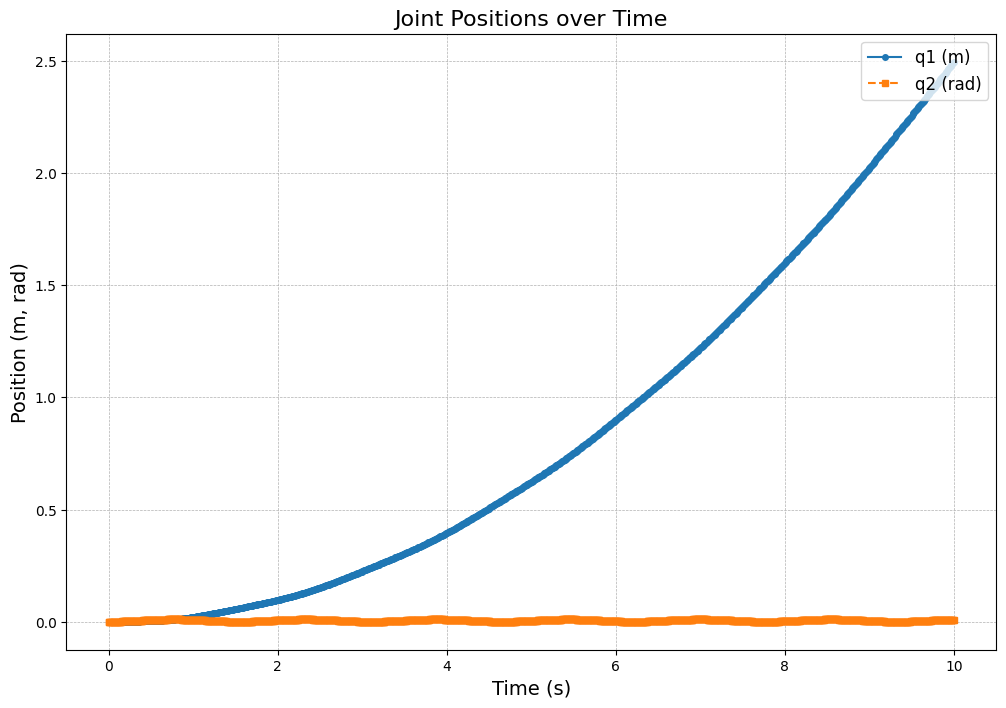

In [12]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(t, q1, label='q1 (m)', linestyle='-', marker='o', markersize=4)
plt.plot(t, q2, label='q2 (rad)', linestyle='--', marker='s', markersize=4)
plt.title('Joint Positions over Time', fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Position (m, rad)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper right', fontsize=12)
plt.show()